In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import cv2

In [2]:
train_df = pd.read_json("C:\\Users\\Mai\\Downloads\\train.json")
test_df = pd.read_json("C:\\Users\\Mai\\Downloads\\test.json")

In [3]:
image_paths = train_df['file']
train_labels = train_df['label']
test_paths=test_df['file']
test_labels = test_df['label']

In [4]:
def load_and_preprocess_image(image_path):
    image_path = "C:\\Users\\Mai\\Downloads\\" + image_path
    img = cv2.imread(image_path)
    img = cv2.resize(img, (96, 96))  
    img = img / 255.0 
    img = img.reshape(-1)  
    return img

In [5]:
train_images = []
for image_path in image_paths:
    image_features = load_and_preprocess_image(image_path)
    train_images.append(image_features)

In [6]:
test_images = []
for image_path in test_paths:
    image_features = load_and_preprocess_image(image_path)
    test_images.append(image_features)

In [7]:
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

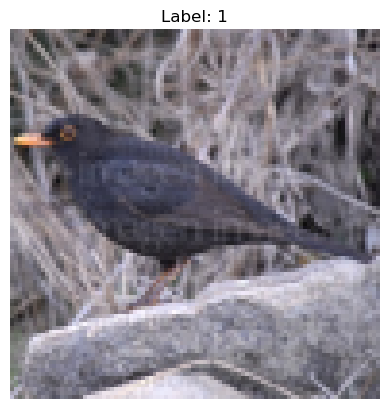

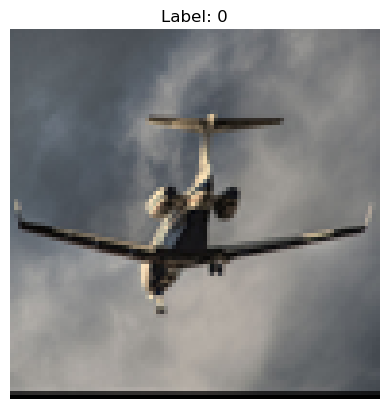

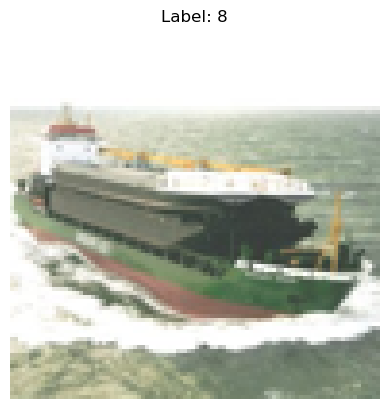

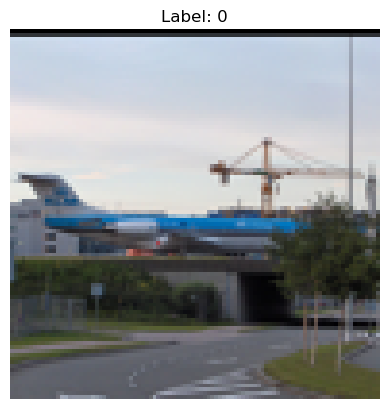

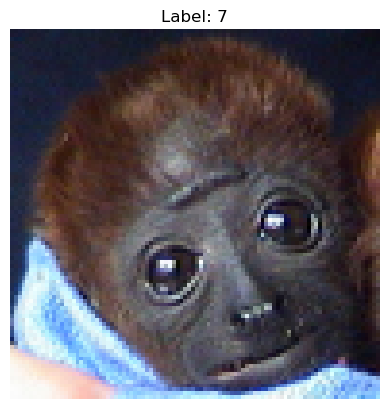

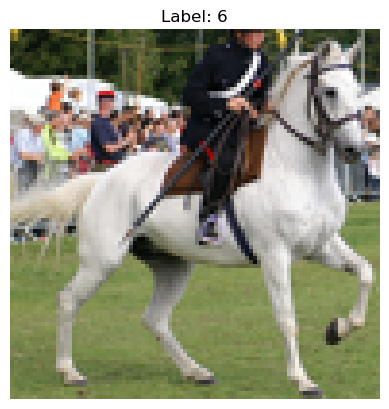

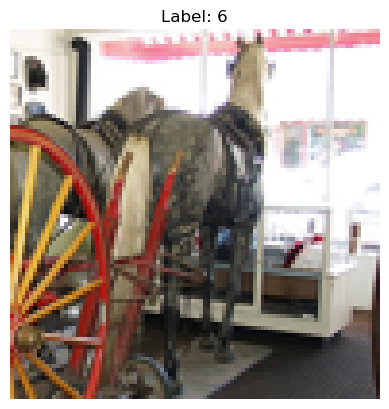

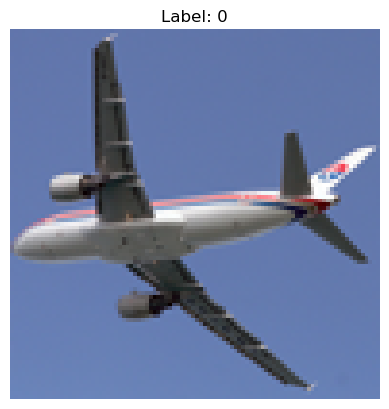

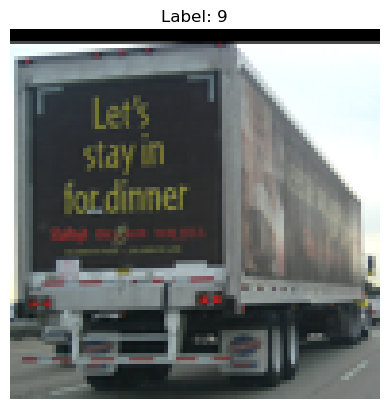

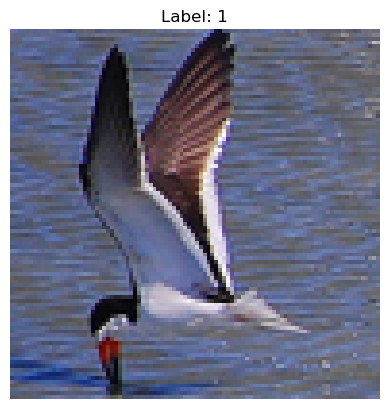

In [8]:
for i in range(10):
    index = np.random.randint(len(X_test))  
    img = X_test[index].reshape(96, 96, 3)  
    img = (img * 255).astype(np.uint8)  
    label = y_test[index]  
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Label: {label}")
    plt.axis('off')  
    plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2715


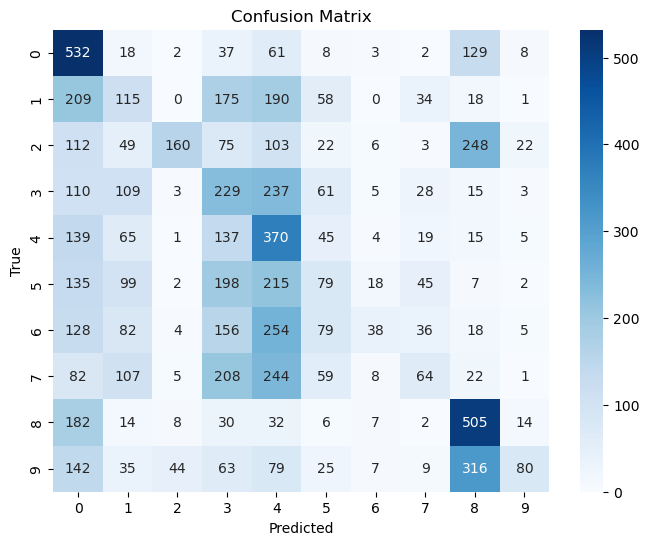

In [12]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
unique_classes = np.unique(y_test)
num_classes = len(unique_classes)
print("Number of classes:", num_classes)

Number of classes: 10


In [14]:
y_probs = knn.predict_proba(X_test) 

In [46]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss = SparseCategoricalCrossentropy()
loss_value = loss(y_test, y_probs)
print("Loss value:", loss_value.numpy())

Loss value: 8.647071


In [16]:
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
roc_auc

0.6596844444444444

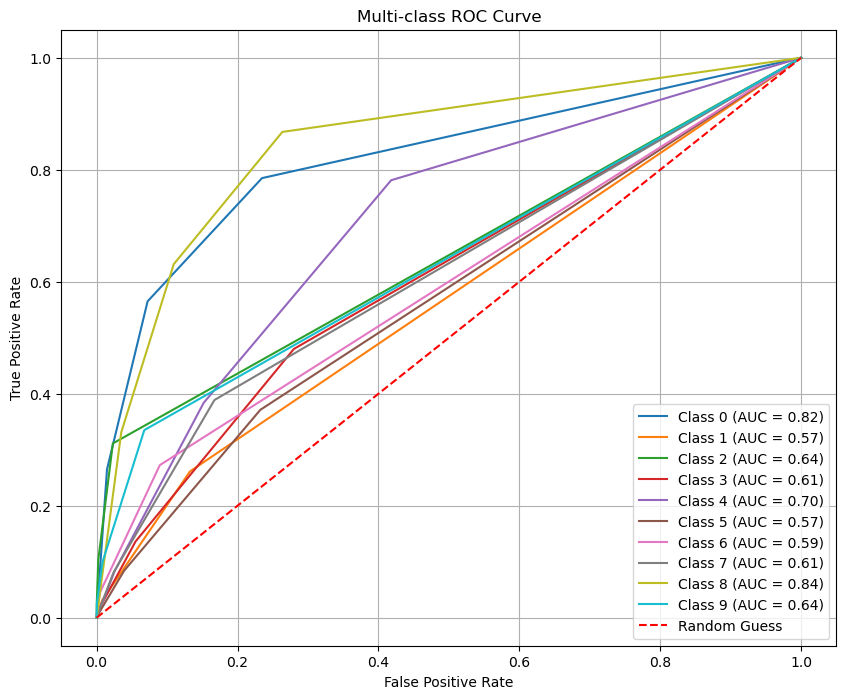

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_probs.shape[1]):    
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 8))
for i in range(y_probs.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

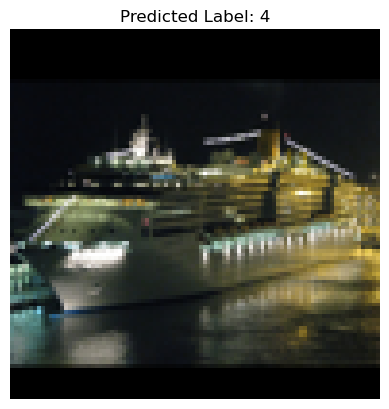

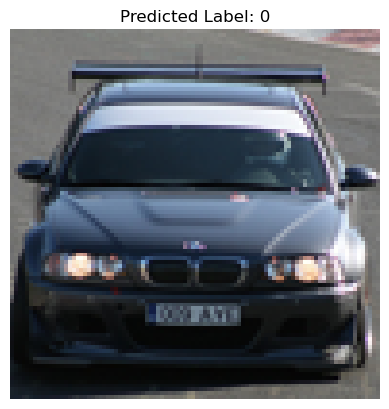

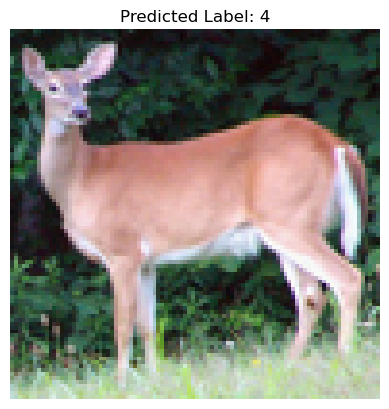

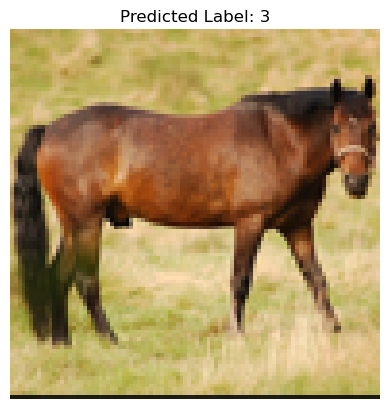

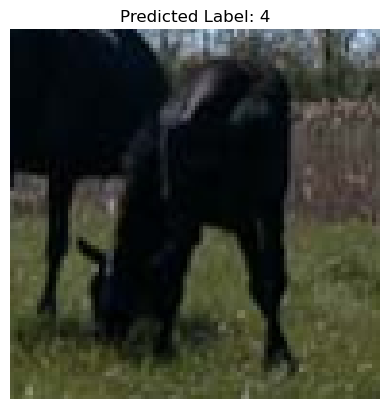

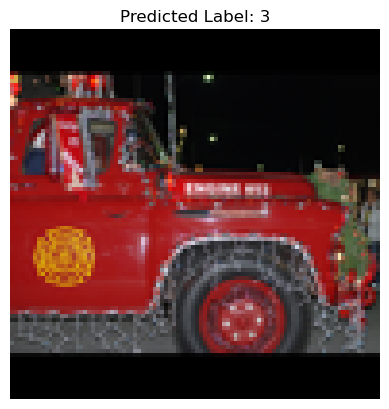

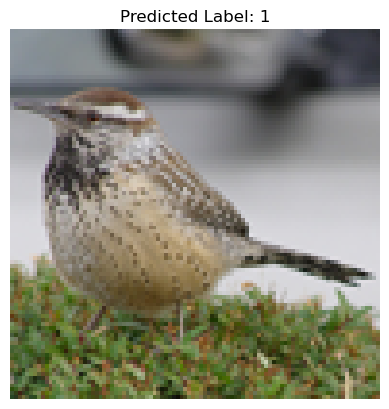

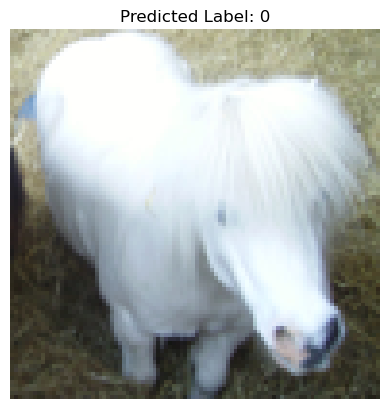

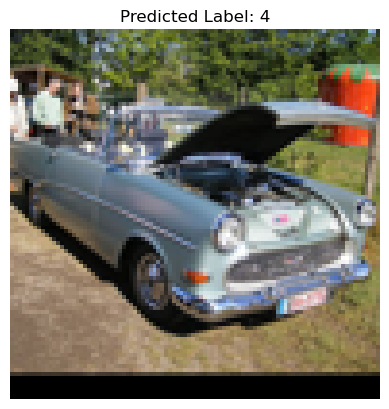

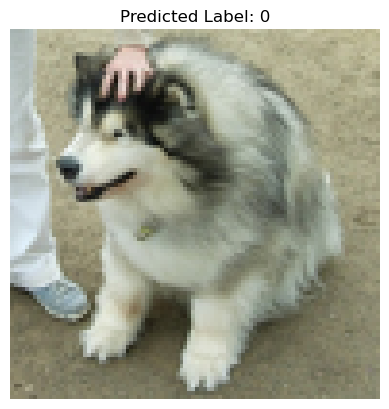

In [18]:
for i in range(10):
    index = np.random.randint(len(X_test))
    img = X_test[index].reshape(96, 96, 3)  
    img = (img * 255).astype(np.uint8)  
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Label: {y_pred[index]}")
    plt.axis('off')
    plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.67      0.41       800
           1       0.17      0.14      0.15       800
           2       0.70      0.20      0.31       800
           3       0.18      0.29      0.22       800
           4       0.21      0.46      0.29       800
           5       0.18      0.10      0.13       800
           6       0.40      0.05      0.08       800
           7       0.26      0.08      0.12       800
           8       0.39      0.63      0.48       800
           9       0.57      0.10      0.17       800

    accuracy                           0.27      8000
   macro avg       0.33      0.27      0.24      8000
weighted avg       0.33      0.27      0.24      8000

